# Concreteness Experiments

Attempt to correlate N/V percentage with concreteness norms from Yao et al. (2017).

Yao, Zhao, et al. "Norms of valence, arousal, concreteness, familiarity, imageability, and context availability for 1,100 Chinese words." Behavior research methods 49.4 (2017): 1374-1385.

In [1]:
import sys
sys.path.append('../')

from collections import defaultdict
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import src.ud_corpus

%load_ext autoreload
%autoreload 2

In [2]:
# Extracted from Yao et al. (2017) PDF using tabula, with manual corrections
yao2017 = pd.read_csv('../data/yao2017_norms.csv')
yao2017.head()

,Chinese words,English translations,VAL_M,VAL_SD,ARO_M,ARO_SD,CON_M,CON_SD,FAM_M,FAM_SD,IMA_M,IMA_SD,AVA_M,AVA_SD,RT_M,RT_SD,ACC_M,ACC_SD
0,爱慕,admire,4.89,1.65,3.39,0.79,4.50,1.97,5.07,0.76,4.01,1.55,5.39,1.24,543.88,33.32,0.935,0.032
1,爱情,love,6.97,1.45,7.43,1.45,5.26,0.84,5.00,0.68,4.92,1.99,5.43,1.36,524.32,38.03,0.910,0.037
2,安然,comfortable,6.81,0.75,6.36,1.08,7.58,1.33,7.69,0.59,6.72,1.44,7.05,0.45,520.45,53.82,0.943,0.046
3,安神,soothing,4.51,2.20,3.41,1.74,5.32,0.54,5.44,1.75,4.52,0.39,5.05,1.19,550.95,40.74,0.881,0.035
4,安详,serene,6.86,1.37,6.11,0.45,6.83,0.53,6.83,0.81,7.05,1.78,6.35,1.12,505.79,61.24,0.913,0.016


## Break down by character

In [3]:
D = defaultdict(list)
for ix, row in yao2017.iterrows():
  for ch in row['Chinese words']:
    D[ch].append(row['CON_M'])

In [4]:
concreteness_df = []
for ch, ratings in D.items():
  concreteness_df.append(pd.Series({
    'char': ch,
    'compounds': len(ratings),
    'concreteness': np.mean(np.array(ratings))
  }))
concreteness_df = pd.DataFrame(concreteness_df)
concreteness_df.head()

,char,compounds,concreteness
0,爱,7,6.032857
1,慕,1,4.500000
2,情,16,5.791250
3,安,6,5.783333
4,然,2,6.300000


## Load UD Kyoto corpus

In [5]:
ud_data = src.ud_corpus.POSCorpus.create_from_ud(glob.glob('../data/UD_Classical_Chinese-Kyoto/*.conllu'))

In [6]:
ud_data.sentences[0]

[{'char': '学', 'pos': 'VERB'},
 {'char': '而', 'pos': 'CCONJ'},
 {'char': '篇', 'pos': 'NOUN'},
 {'char': '第', 'pos': 'NOUN'},
 {'char': '一', 'pos': 'NUM'}]

In [7]:
summary_data = ud_data.get_nv_stats().sort_values('total_count', ascending=False)
summary_data = summary_data[summary_data.total_count >= 10]
summary_data.head(10)

,char,noun_count,verb_count,total_count,noun_ratio
6,曰,0,2065,2065,0.000000
5,子,1421,8,1429,0.994402
21,人,1163,0,1163,1.000000
14,有,0,967,967,0.000000
72,以,0,862,862,0.000000
24,君,695,8,703,0.988620
203,天,537,2,539,0.996289
26,为,0,528,528,0.000000
71,民,482,0,482,1.000000
100,无,0,421,421,0.000000


## Join together noun_ratio and concreteness

In [8]:
combined_df = pd.merge(summary_data, concreteness_df, how='inner', on='char')

/h/bai/moar/bai-conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Noun ratio')

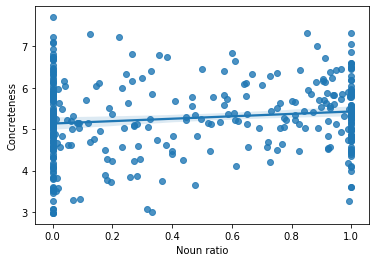

In [9]:
sns.regplot(combined_df.noun_ratio, combined_df.concreteness)
plt.ylabel('Concreteness')
plt.xlabel('Noun ratio')

In [10]:
scipy.stats.pearsonr(combined_df.noun_ratio, combined_df.concreteness)

(0.1388541082294863, 0.006855132269165899)